In [ ]:
import csv

def txt_to_csv(txt_file, csv_file):
    with open(txt_file, 'r') as infile, open(csv_file, 'w', newline='') as outfile:
        reader = csv.reader(infile, delimiter=',', skipinitialspace=True)
        writer = csv.writer(outfile)

        for row in reader:
            if not row:  # Skip empty lines
                continue
            row = [col.strip() for col in row]  # Trim spaces
            if len(row) == 15:
                writer.writerow(row)
            else:
                print(f"Skipping malformed row: {row}")  # Debugging info

txt_to_csv('/content/adult.data.txt', '/content/adult.data.csv')


In [ ]:
import csv

def txt_to_csv(txt_file, csv_file):
    column_names = [
        "age", "workclass", "fnlwgt", "education", "education-num",
        "marital-status", "occupation", "relationship", "race", "sex",
        "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
    ]

    with open(txt_file, 'r') as infile, open(csv_file, 'w', newline='') as outfile:
        reader = csv.reader(infile, delimiter=',', skipinitialspace=True)
        writer = csv.writer(outfile)

        writer.writerow(column_names)  # Write header row

        for row in reader:
            if not row:  # Skip empty lines
                continue
            row = [col.strip() for col in row]  # Trim spaces
            if len(row) == 15:
                writer.writerow(row)
            else:
                print(f"Skipping malformed row: {row}")  # Debugging info

txt_to_csv('/content/adult.data.txt', '/content/adult.data.csv')


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#DATA CLEANING

###Loading of dataset

In [ ]:
#Loading of dataset
df = pd.read_csv('/content/adult.data.csv')

In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.shape

(32561, 15)

There are 15 features and 32561 data entires.

###Handle missing values using imputation or removal techniques.

In [ ]:
# Handle missing values
# Replace missing values (marked as '?') with NaN
df.replace('?', np.nan, inplace=True)

# Check missing values
print("\nMissing Values Before Handling:")
print(df.isnull().sum())



Missing Values Before Handling:
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


In [ ]:
# Impute missing categorical values with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check again
print("\nMissing Values After Handling:")
print(df.isnull().sum())



Missing Values After Handling:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


<ipython-input-27-a4baa7f36efd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


###Identify and remove duplicate records.

In [ ]:
#Identify duplicates
duplicates = df[df.duplicated()]
print(f"\n Detected {duplicates.shape[0]} duplicate rows before removal.")

if not duplicates.empty:
    print("\nSample duplicate rows:")
    print(duplicates)


 Detected 24 duplicate rows before removal.

Sample duplicate rows:
       age         workclass  fnlwgt     education  education-num  \
4881    25           Private  308144     Bachelors             13   
5104    90           Private   52386  Some-college             10   
9171    21           Private  250051  Some-college             10   
11631   20           Private  107658  Some-college             10   
13084   25           Private  195994       1st-4th              2   
15059   21           Private  243368     Preschool              1   
17040   46           Private  173243       HS-grad              9   
18555   30           Private  144593       HS-grad              9   
18698   19           Private   97261       HS-grad              9   
21318   19           Private  138153  Some-college             10   
21490   19           Private  146679  Some-college             10   
21875   49           Private   31267       7th-8th              4   
22300   25           Private  1959

In [ ]:
#Remove duplicates
df.drop_duplicates(inplace=True)

###Detect and treat outliers using appropriate statistical methods.

In [ ]:
# Define function for outlier detection using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Identify outliers for each numerical column
numerical_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

print("\n Outliers detected in numerical columns:")
for col in numerical_cols:
    outliers = detect_outliers(df, col)
    print(f"\nColumn: {col} - Outliers Found: {outliers.shape[0]}")
    if not outliers.empty:
        print(outliers.shape)
        print(outliers.head())


📌 Outliers detected in numerical columns:

Column: age - Outliers Found: 142
(142, 15)
      age         workclass  fnlwgt     education  education-num  \
74     79           Private  124744  Some-college             10   
222    90           Private   51744       HS-grad              9   
430    80           Private  107762       HS-grad              9   
918    81  Self-emp-not-inc  136063       HS-grad              9   
1040   90           Private  137018       HS-grad              9   

          marital-status       occupation    relationship   race     sex  \
74    Married-civ-spouse   Prof-specialty  Other-relative  White    Male   
222        Never-married    Other-service   Not-in-family  Black    Male   
430              Widowed   Prof-specialty   Not-in-family  White    Male   
918   Married-civ-spouse  Exec-managerial         Husband  White    Male   
1040       Never-married    Other-service   Not-in-family  White  Female   

      capital-gain  capital-loss  hours-per-we

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply outlier removal to numerical columns
for col in numerical_cols:
    df = remove_outliers(df, col)

In [ ]:
df.shape

(18991, 15)

###Standardize categorical values (e.g., fixing typos or formatting inconsistencies).

In [ ]:
# Strip spaces, convert to lowercase, and fix typos
df = df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)

# Fix common typos
standard_categories = {
    'workclass': {'self-emp-inc': 'self-employed', 'self-emp-not-inc': 'self-employed'},
    'marital-status': {'married-civ-spouse': 'married', 'married-spouse-absent': 'married'},
    'income': {'<=50k': 'low', '>50k': 'high'}
}

for col, corrections in standard_categories.items():
    df[col] = df[col].replace(corrections)


<ipython-input-39-ccabf2bbd125>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)


In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2,38,private,215646,hs-grad,9,divorced,handlers-cleaners,not-in-family,white,male,0,0,40,united-states,low
3,53,private,234721,11th,7,married,handlers-cleaners,husband,black,male,0,0,40,united-states,low
4,28,private,338409,bachelors,13,married,prof-specialty,wife,black,female,0,0,40,cuba,low
5,37,private,284582,masters,14,married,exec-managerial,wife,white,female,0,0,40,united-states,low
7,52,self-employed,209642,hs-grad,9,married,exec-managerial,husband,white,male,0,0,45,united-states,high


In [ ]:
df.to_csv('/content/adult_cleaned.csv', index=False)

In [ ]:
print("\n Data Cleaning Completed!")
print(f"Final dataset shape: {df.shape}")
print(df.head())


 Data Cleaning Completed!
Final dataset shape: (18991, 15)
   age      workclass  fnlwgt  education  education-num marital-status  \
2   38        private  215646    hs-grad              9       divorced   
3   53        private  234721       11th              7        married   
4   28        private  338409  bachelors             13        married   
5   37        private  284582    masters             14        married   
7   52  self-employed  209642    hs-grad              9        married   

          occupation   relationship   race     sex  capital-gain  \
2  handlers-cleaners  not-in-family  white    male             0   
3  handlers-cleaners        husband  black    male             0   
4     prof-specialty           wife  black  female             0   
5    exec-managerial           wife  white  female             0   
7    exec-managerial        husband  white    male             0   

   capital-loss  hours-per-week native-country income  
2             0              4

#EXPLORATORY DATA ANALYSIS(EDA)

##Univariate Analysis (Single-Variable Exploration)

###Summary statistics (mean, median, mode, variance, skewness, etc.).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [ ]:
df = pd.read_csv('/content/adult_cleaned.csv')

In [ ]:
print("Summary Statistics for Numerical Columns:")
summary_stats = df.describe().T
print(summary_stats)
numerical_df = df.select_dtypes(include=np.number)
summary_stats["skewness"] = numerical_df.skew()
summary_stats["mode"] = df.mode().iloc[0]
summary_stats['var'] = summary_stats['std']**2 # Calculate variance
print(summary_stats[['mean', '50%', 'std', 'var', 'skewness', 'mode']]) # Use '50%' instead of 'median'

Summary Statistics for Numerical Columns:
                  count           mean           std      min       25%  \
age             18991.0      38.050498     12.026915     17.0      28.0   
fnlwgt          18991.0  180715.467432  87085.715528  14878.0  117499.0   
education-num   18991.0      10.246327      2.152306      5.0       9.0   
capital-gain    18991.0       0.000000      0.000000      0.0       0.0   
capital-loss    18991.0       0.000000      0.000000      0.0       0.0   
hours-per-week  18991.0      41.470486      3.950531     33.0      40.0   

                     50%       75%       max  
age                 37.0      47.0      78.0  
fnlwgt          176839.0  228910.0  416415.0  
education-num       10.0      12.0      16.0  
capital-gain         0.0       0.0       0.0  
capital-loss         0.0       0.0       0.0  
hours-per-week      40.0      40.0      52.0  
                         mean       50%           std           var  skewness  \
age                 38

###Frequency distributions for categorical variables.

In [ ]:
print("\n Frequency Distributions for Categorical Columns:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n🔹 Column: {col}")
    print(df[col].value_counts())


 Frequency Distributions for Categorical Columns:

🔹 Column: workclass
workclass
private          14575
self-employed     1584
local-gov         1333
state-gov          830
federal-gov        665
never-worked         2
without-pay          2
Name: count, dtype: int64

🔹 Column: education
education
hs-grad         6941
some-college    4252
bachelors       3211
masters          939
assoc-voc        915
assoc-acdm       653
11th             580
10th             532
9th              344
12th             242
prof-school      211
doctorate        171
Name: count, dtype: int64

🔹 Column: marital-status
marital-status
married              8827
never-married        6085
divorced             2963
separated             657
widowed               447
married-af-spouse      12
Name: count, dtype: int64

🔹 Column: occupation
occupation
prof-specialty       3097
craft-repair         2815
adm-clerical         2579
exec-managerial      2376
sales                1899
other-service        1615
machine-op

###Histograms and box plots to visualize distributions.


 Generating Histograms for Numerical Variables...


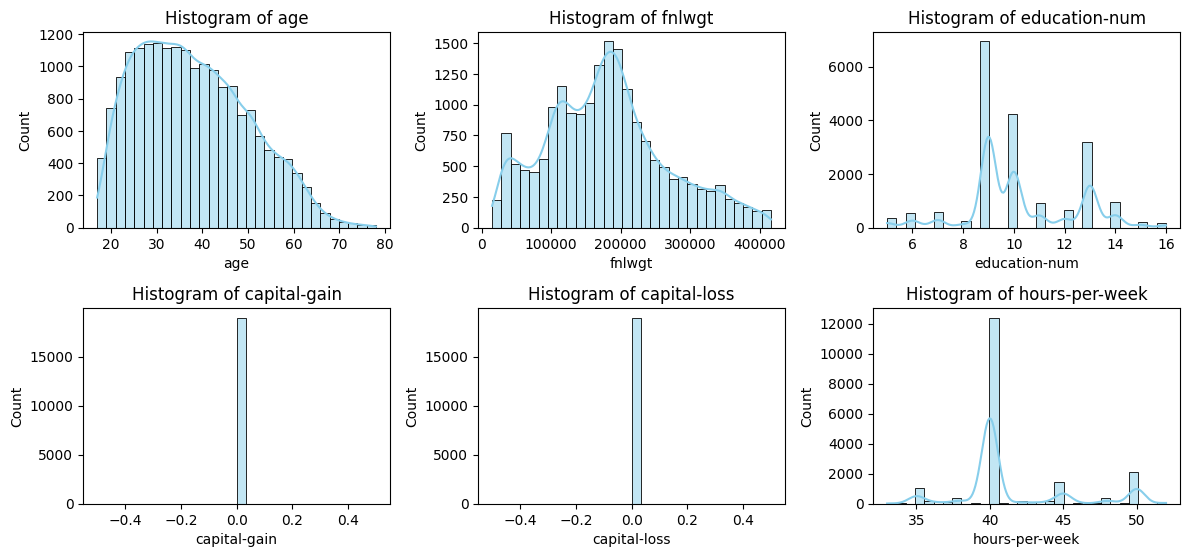

In [ ]:
print("\n Generating Histograms for Numerical Variables...")
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.select_dtypes(include=['int64', 'float64']).columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


 Generating Box Plots for Numerical Variables...


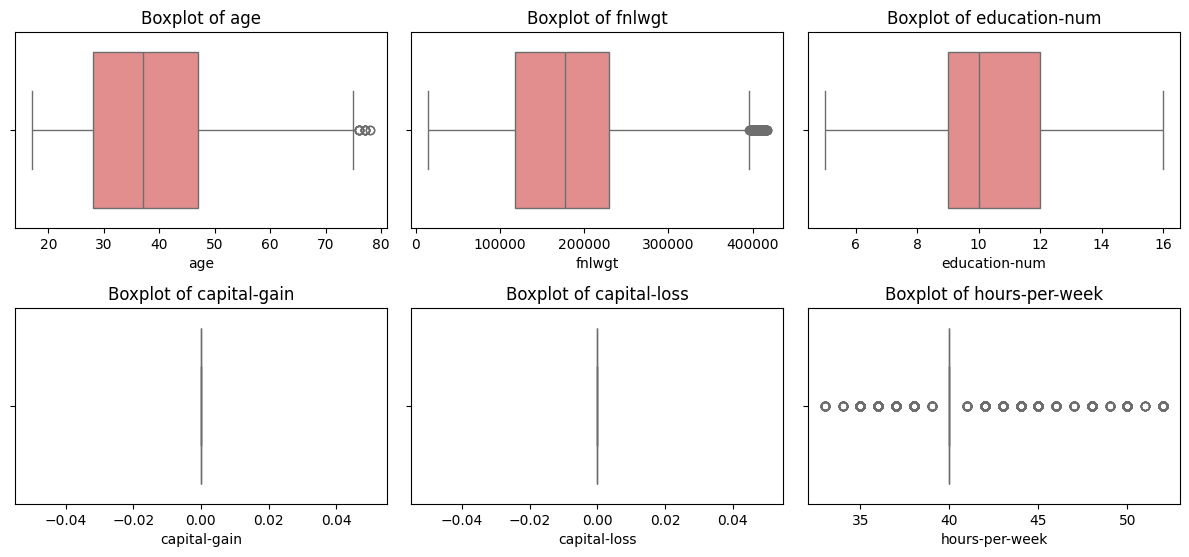

In [ ]:
print("\n Generating Box Plots for Numerical Variables...")
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.select_dtypes(include=['int64', 'float64']).columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

##Bivariate Analysis (Two-Variable Exploration)

###Correlation matrix to identify relationships between numerical variables.


 Generating Correlation Matrix...


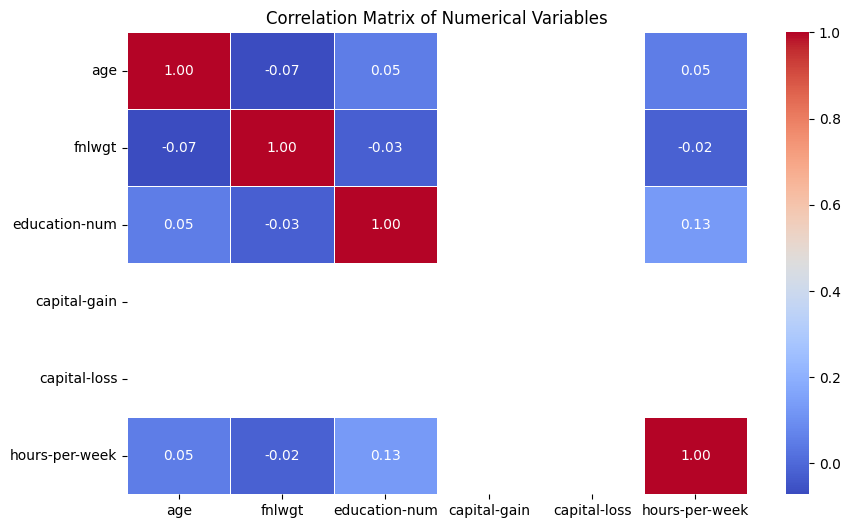

In [ ]:
print("\n Generating Correlation Matrix...")
plt.figure(figsize=(10, 6))
# Select only numerical features for the calculation of correlation
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

###Scatter plots for continuous variable relationships.


 Generating Scatter Plots for Continuous Variable Relationships...


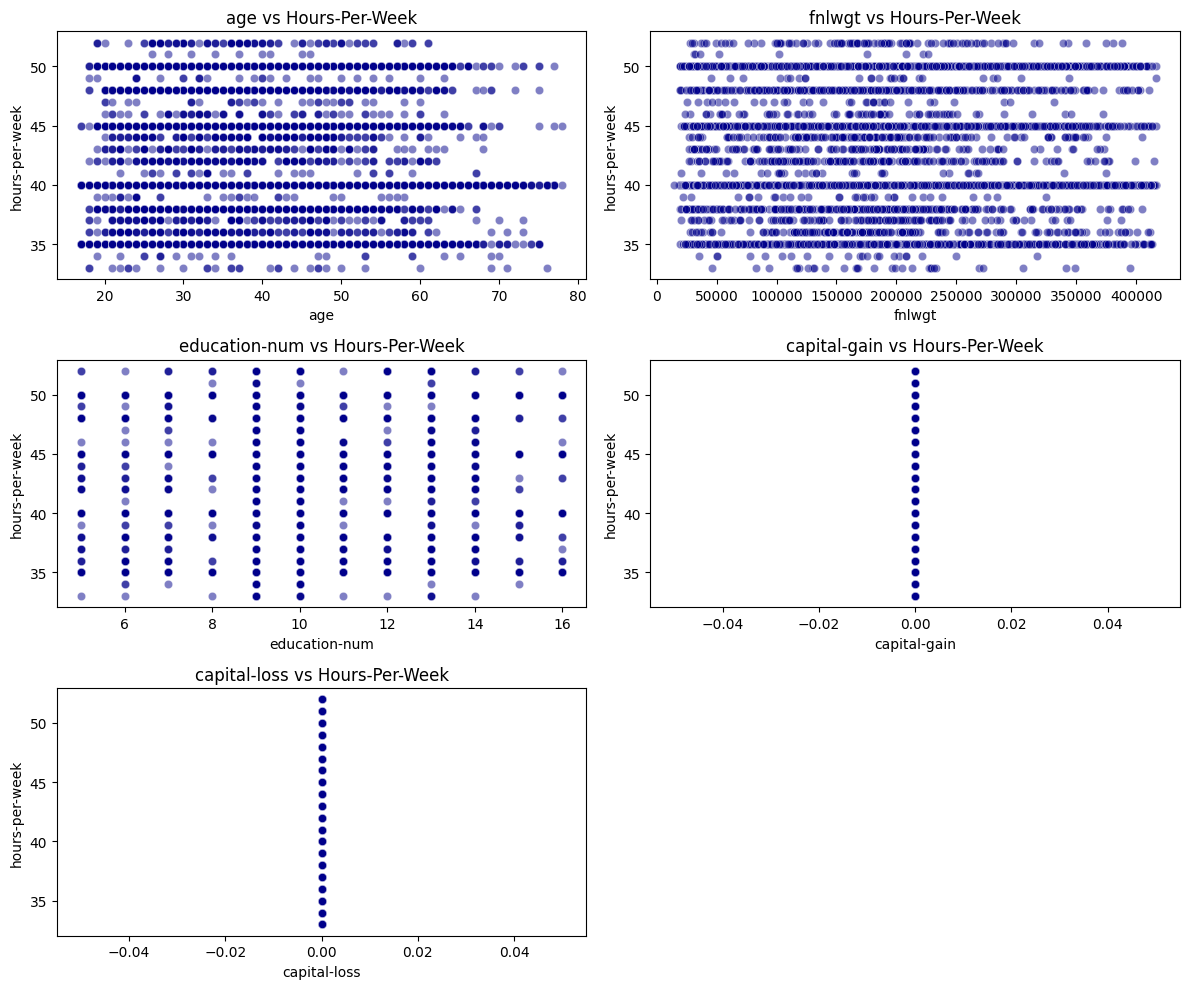

In [ ]:
print("\n Generating Scatter Plots for Continuous Variable Relationships...")
numerical_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols[:-1]):  # Pair with the last column
    plt.subplot(3, 2, i + 1)
    sns.scatterplot(x=df[col], y=df['hours-per-week'], alpha=0.5, color='darkblue')
    plt.title(f'{col} vs Hours-Per-Week')
plt.tight_layout()
plt.show()

###Bar plots, violin plots, and box plots to compare categorical and numerical variables.


 Generating Box Plots for Categorical vs. Numerical Variables...


<ipython-input-58-ee55b70a0eef>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['hours-per-week'], palette='Set2')
<ipython-input-58-ee55b70a0eef>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['hours-per-week'], palette='Set2')
<ipython-input-58-ee55b70a0eef>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], y=df['hours-per-week'], palette='Set2')


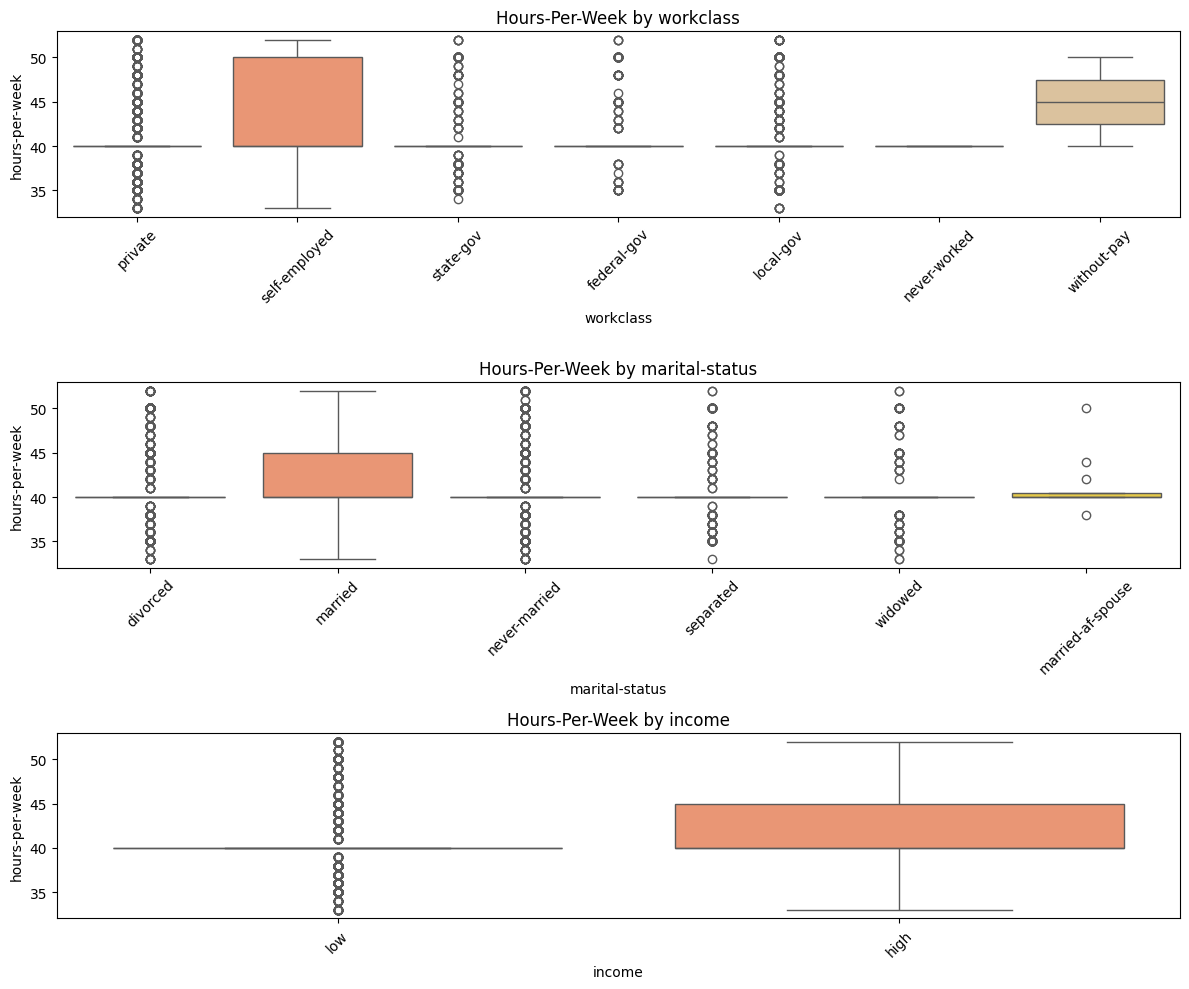

In [ ]:
print("\n Generating Box Plots for Categorical vs. Numerical Variables...")
plt.figure(figsize=(12, 10))
for i, col in enumerate(['workclass', 'marital-status', 'income']):
    plt.subplot(3, 1, i + 1)
    sns.boxplot(x=df[col], y=df['hours-per-week'], palette='Set2')
    plt.xticks(rotation=45)
    plt.title(f'Hours-Per-Week by {col}')
plt.tight_layout()
plt.show()


 Generating Violin Plots for Categorical vs. Numerical Variables...


<ipython-input-59-63d30460091f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[col], y=df['hours-per-week'], palette='pastel')
<ipython-input-59-63d30460091f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[col], y=df['hours-per-week'], palette='pastel')
<ipython-input-59-63d30460091f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[col], y=df['hours-per-week'], palette='pastel')


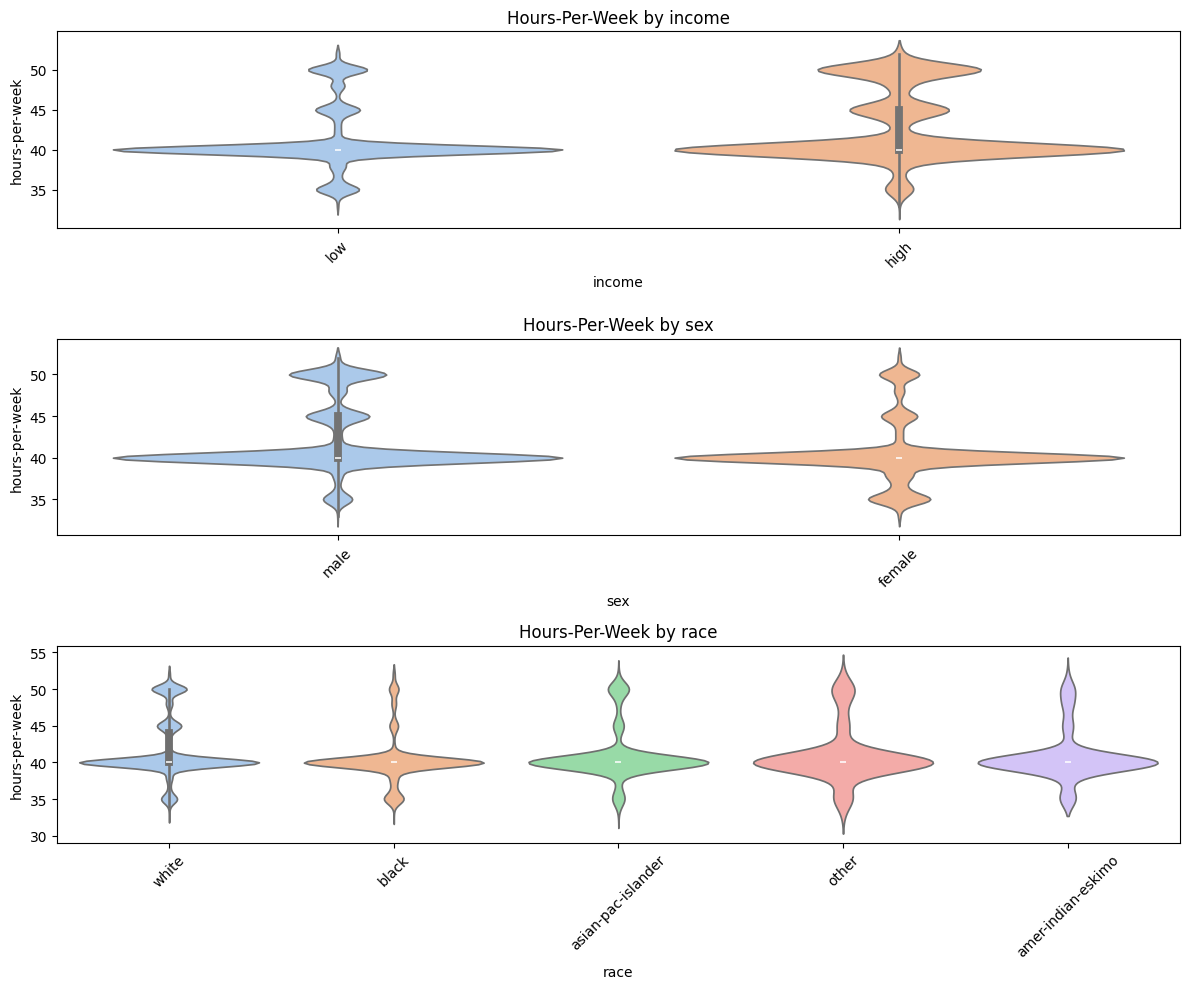

In [ ]:
print("\n Generating Violin Plots for Categorical vs. Numerical Variables...")
plt.figure(figsize=(12, 10))
for i, col in enumerate(['income', 'sex', 'race']):
    plt.subplot(3, 1, i + 1)
    sns.violinplot(x=df[col], y=df['hours-per-week'], palette='pastel')
    plt.xticks(rotation=45)
    plt.title(f'Hours-Per-Week by {col}')
plt.tight_layout()
plt.show()


 Generating Bar Plots for Categorical Variables vs. Mean Hours-Per-Week...


<ipython-input-61-418fefd762e6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['income'], y=df['hours-per-week'], palette='viridis', estimator=np.mean)


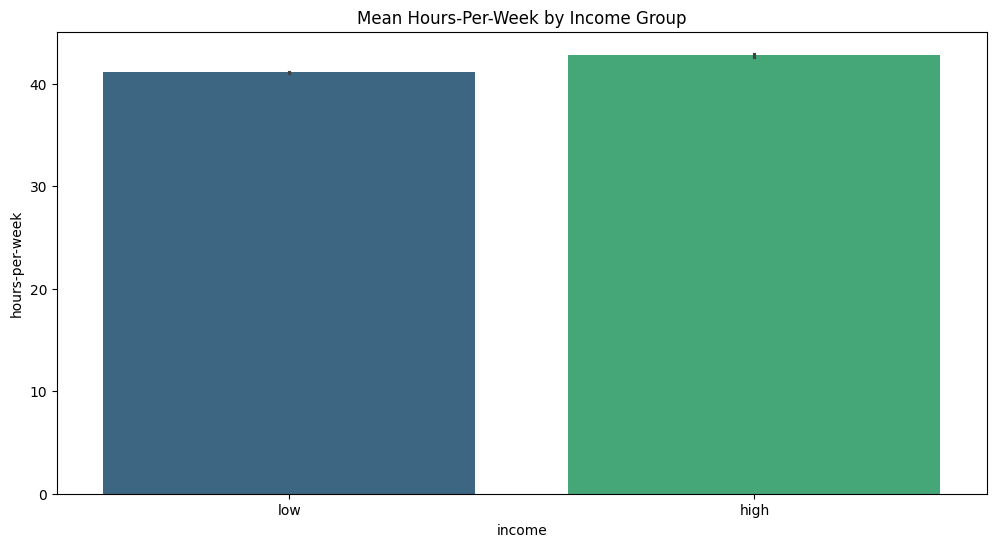

In [ ]:
print("\n Generating Bar Plots for Categorical Variables vs. Mean Hours-Per-Week...")
plt.figure(figsize=(12, 6))
sns.barplot(x=df['income'], y=df['hours-per-week'], palette='viridis', estimator=np.mean)
plt.title('Mean Hours-Per-Week by Income Group')
plt.show()

##Multivariate Analysis (Multiple Variables Exploration)

###Pair plots to analyze multiple relationships simultaneously.


 Generating Pair Plots for Key Numerical Variables...


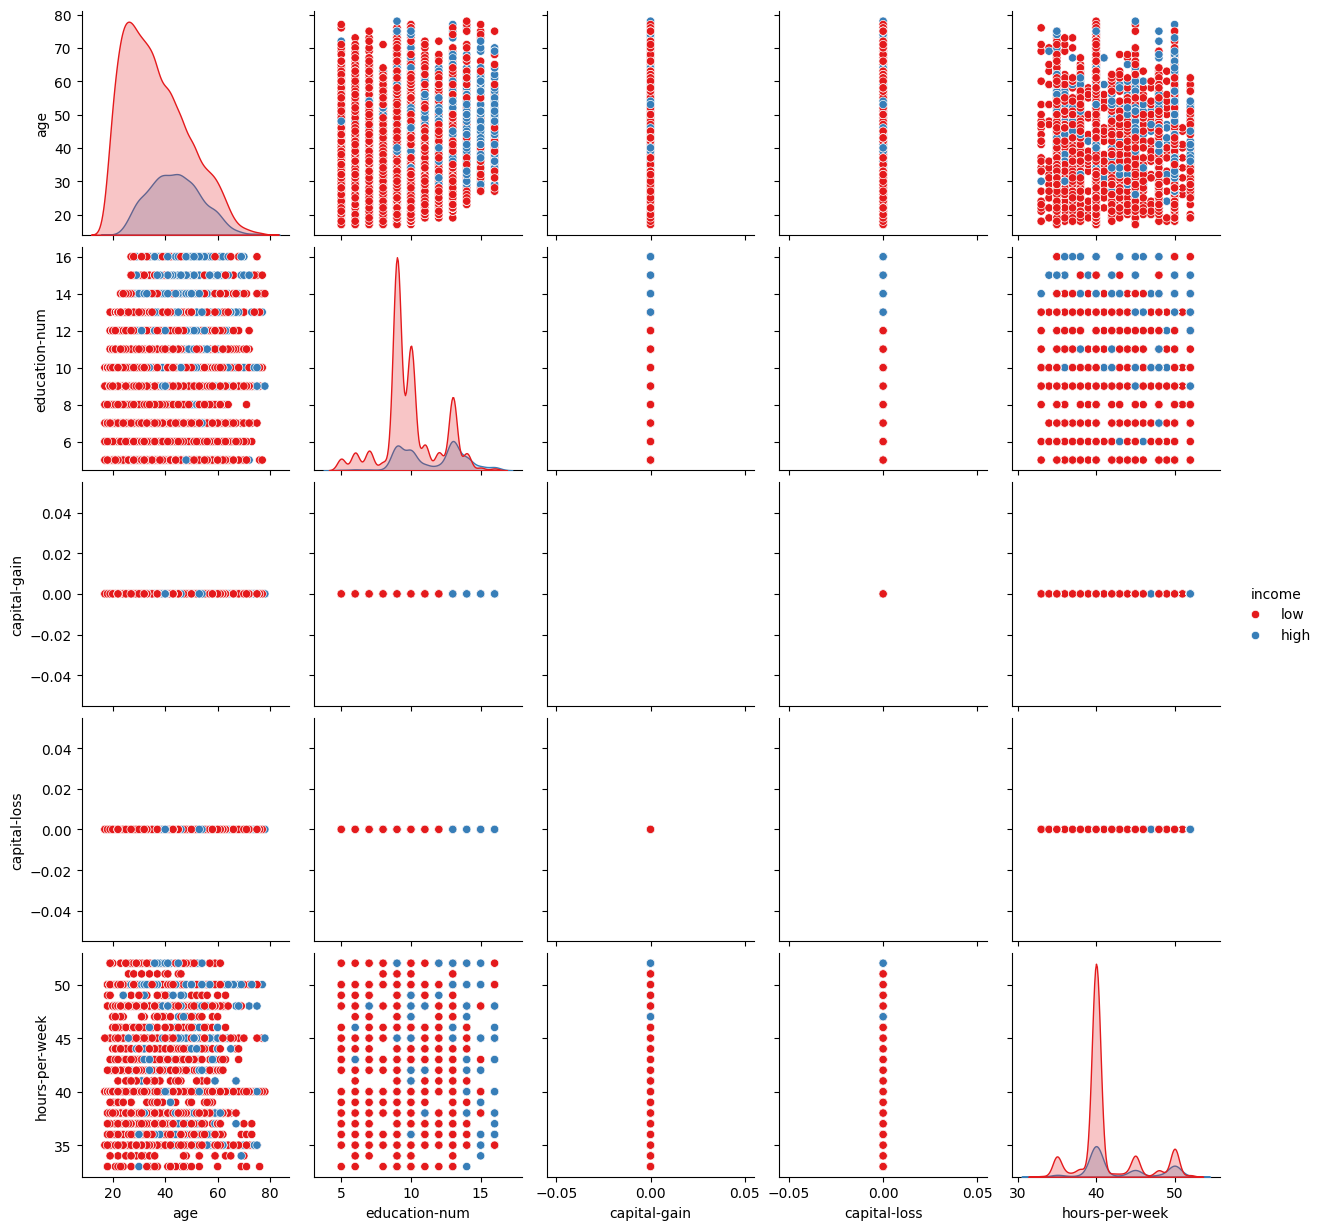

In [ ]:
print("\n Generating Pair Plots for Key Numerical Variables...")
numerical_cols = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

sns.pairplot(df[numerical_cols + ['income']], hue='income', palette='Set1', diag_kind='kde')
plt.show()

###Heatmaps to visualize correlations among multiple variables.


 Generating Heatmap of Correlations...


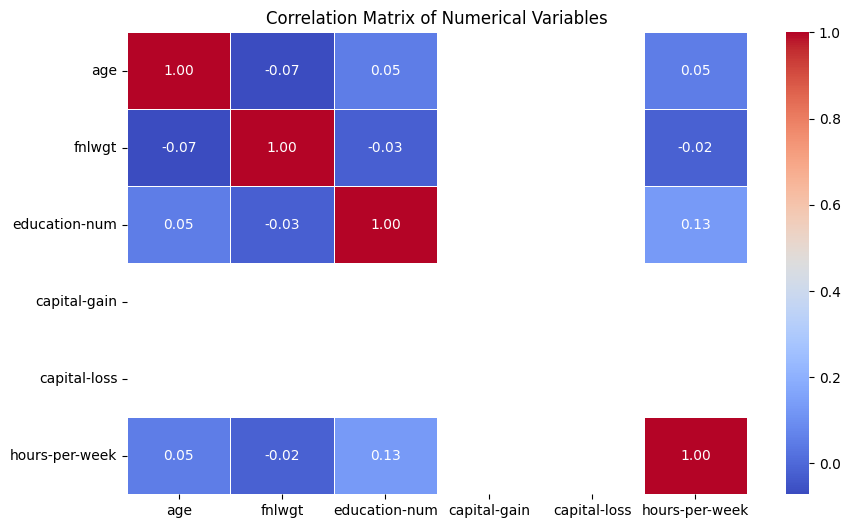

In [ ]:
print("\n Generating Heatmap of Correlations...")
plt.figure(figsize=(10, 6))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()



### Grouped comparisons to identify combined effects of multiple features.


 Generating Grouped Comparisons...


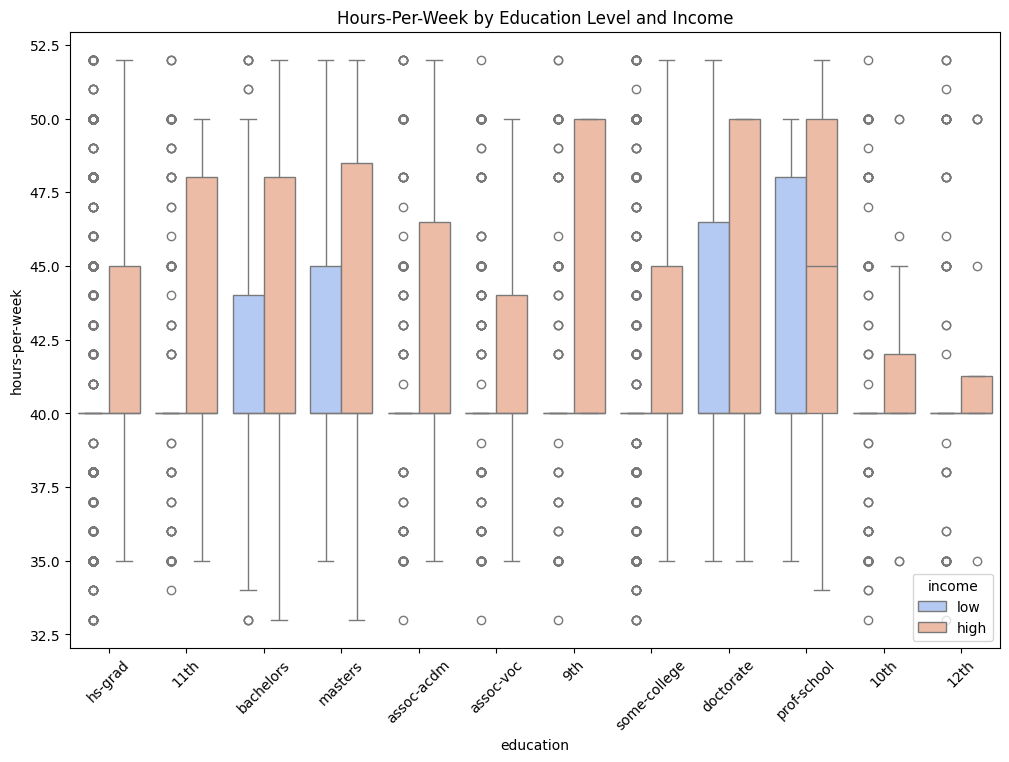

In [ ]:
print("\n Generating Grouped Comparisons...")
plt.figure(figsize=(12, 8))
sns.boxplot(x='education', y='hours-per-week', hue='income', data=df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Hours-Per-Week by Education Level and Income")
plt.show()


 Generating Bar Plot for Mean Hours-Per-Week by Workclass and Income...


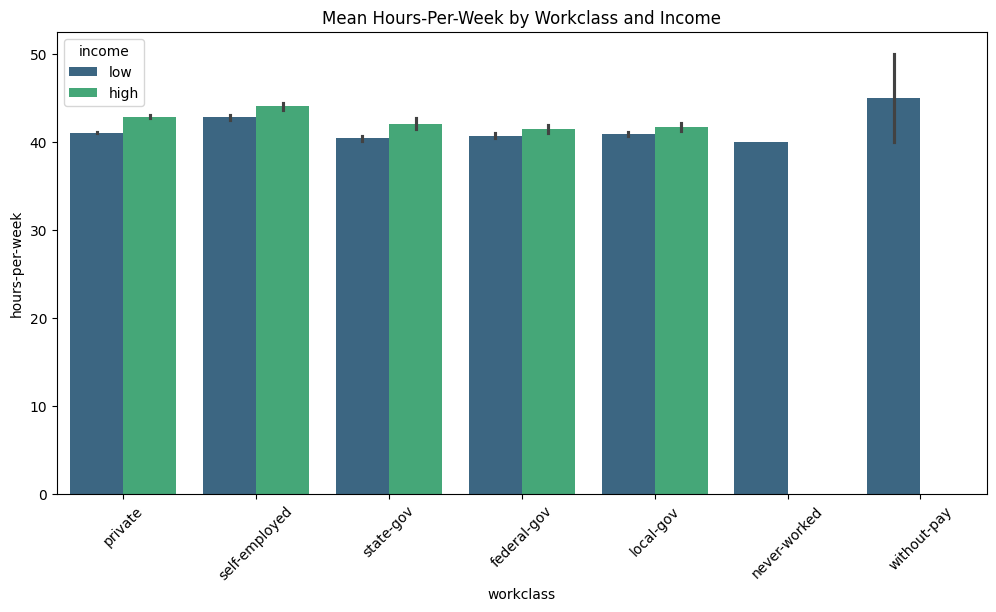

In [ ]:
print("\n Generating Bar Plot for Mean Hours-Per-Week by Workclass and Income...")
plt.figure(figsize=(12, 6))
sns.barplot(x='workclass', y='hours-per-week', hue='income', data=df, palette='viridis', estimator=np.mean)
plt.xticks(rotation=45)
plt.title("Mean Hours-Per-Week by Workclass and Income")
plt.show()